# LPSC - TP3 - Simulations

Sébastien Deriaz

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mandelbrot import mandelbrot, mandelbrot_fixed
from numba import jit

## Paramètres

In [2]:
# Taille de l'écran (largeur x hauteur)
SCREEN = (800, 600)
# Nombre de bits
N_bits = 18
# Nombre de décimales
N_decimals = 15

## Simulation float

In [3]:
@jit(nopython=True)
def calc_matrix(x_min, x_max, y_min, y_max):
    MAX_ITER = 100
    M = np.zeros(SCREEN[::-1])
    xi, yi = 0, 0
    for x in np.linspace(x_min, x_max, SCREEN[0]):
        yi = 0
        for y in np.linspace(y_min, y_max, SCREEN[1]):
            M[yi, xi] = mandelbrot(x + 1j*y, max_iter=MAX_ITER, r_stop=2)
            yi += 1
        xi += 1

    return M

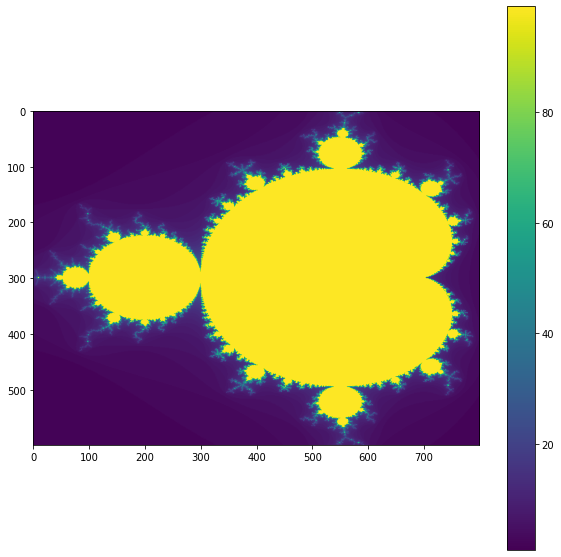

In [4]:
M = calc_matrix(-1.5,0.5,-1,1)

plt.figure(figsize=(10,10))
plt.imshow(M)
plt.colorbar()
plt.show()

## Simulation virgule fixe